# Assignment_stat1_solution

Problem Statement 1:
The marks awarded for an assignment set for a Year 8 class of 20 students were as
follows:
6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8
Calculate the mean, median, mode and standard deviation for the problem

In [49]:
import numpy as np
from scipy import stats
marks = np.array([6,7,5,7,7,8,7,6,9, 7, 4, 10, 6, 8, 8, 9, 5, 6, 4, 8])
print(f'the mean is {marks.mean()}')
mode = stats.mode(marks)
print(f'the mode is {mode[0]}')
print(f'the mode is {round(np.std(marks),2)}')

the mean is 6.85
the mode is [7]
the mode is 1.59


Problem Statement 2:
The number of calls from motorists per day for roadside service was recorded for a
particular month:
28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,
100, 75, 104, 97, 75,
123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [50]:
import numpy as np
from scipy import stats
marks = np.array([28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109])
print(f'the mean is {marks.mean()}')
mode = stats.mode(marks)
print(f'the mode is {mode[0]}')
print(f'the mode is {round(np.std(marks),2)}')

the mean is 107.51428571428572
the mode is [75]
the mode is 38.77


Problem Statement 3:
The number of times I go to the gym in weekdays, are given below along with its
associated probability:
x = 0, 1, 2, 3, 4, 5
f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01
Calculate the mean no. of workouts in a week. Also evaluate the variance involved in
it.

In [51]:
import numpy as np
from scipy import stats
x = np.array([0, 1, 2, 3, 4, 5])
p_x = np.array([0.09, 0.15, 0.40, 0.25, 0.10, 0.01])
import functools
print(f'the mean is {functools.reduce(lambda x,y:x+y, x*p_x)}')
mean = functools.reduce(lambda x,y:x+y, x*p_x)
#variance
var = 0
for i in range(len(x)):
    temp = ((x[0] - mean)**2)*p_x[i]
    var = var + temp
print(f'the variance is {var}')    

the mean is 2.15
the variance is 4.6225


Problem Statement 4:
Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF (𝑑) =
20𝑒−20(𝑑−12.5), 𝑑 ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm? What is your conclusion regarding the proportion of scraps?

In [52]:
from math import exp
𝑑 = 20*𝑒xp(-20*12.6)
d

7.224712276653479e-109

In [54]:
from scipy.integrate import quad
def f(x):
    return 20*𝑒xp(-20*x + 20*12.5)

In [55]:
# proportion of the aluminium sheet with diameter >12.6 that needs to be cut
integrate, err = quad(f, 12.6, np.inf)
integrate

0.13533528323661456

In [56]:
integrate, err = quad(f, 12.5, 12.6)
integrate

0.8646647167633696

In [58]:
#cdf when the diameter is 11mm
integrate, err = quad(f,0, 11)
integrate

3.746454614502671e+108

The p of diameter 12.6 falls within a signifacnt level of 5%. Hence the null hypothesis that the diameter is 12.5 with confidence level of 5% is true

Problem Statement 5:
A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
Calculate the average value of this process. Also evaluate the standard deviation
associated with it.

In [7]:
import math
def binomial_prob(n, p, x):
    b = (math.factorial(n)/(math.factorial(x)*math.factorial(n-x)))*(p**x)*((1-p)**(n-x))
    return b

n = 6
p = 0.3
x = 2
binomial_prob(6, 0.3, 2)

0.3241349999999999

Expected value E - mean for 1000 trials

In [10]:
1000*0.3241349999999999

324.1349999999999

standard deviation of a bionomial distrution of 1000 trails

In [11]:
math.sqrt(1000*0.3241349999999999*(1-0.3241349999999999))

14.801064210893754

Gaurav attempts to solve 8 questions per day with a correction rate of 75%, while Barakha averages around 12 questions per day with a correction rate of 45%. What is the probability that each of them will solve 5 questions correctly? What happens in cases of 4 and 6 correct solutions? What do you infer from it? What are the two main governing factors affecting their ability to solve questions correctly? Give a pictorial representation of the same to validate your answer

In [14]:
#5 correct solutions
print('Gaurav: {}'.format(binomial_prob(8, 0.75, 5)))
print('Barkha: {}'.format(binomial_prob(12, 0.45, 5)))

Gaurav: 0.2076416015625
Barkha: 0.22249823843265837


In [17]:
#4 and 6 correct solutions
print('Gaurav: {}'.format(binomial_prob(8, 0.75, 6)))
print('Barkha: {}'.format(binomial_prob(12, 0.45, 6)))

Gaurav: 0.31146240234375
Barkha: 0.2123846821402648


The governing factors are the total number of questions and then expected correct answers

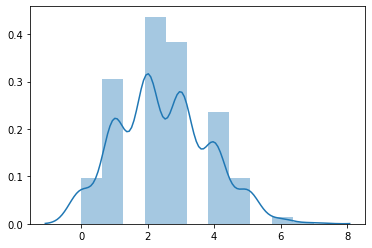

In [25]:
# Gaurav

from scipy.stats import binom
import numpy as np
import seaborn as sns
# Number of trials
trials = 1000
# Number of independent experiments in each trial
n = 10
# Probability of success for each experiment
p = 0.75
x = range(0,11)
def run_binom(trials, n, p):
    success = []
    for i in range(trials):
        event = [np.random.random() for i in range(n)]
        success.append(len([i for i in event if i>=0.75]))
    return success
success = run_binom(trials, n, p)
sns.distplot(success, bins=11, label='simulation results')


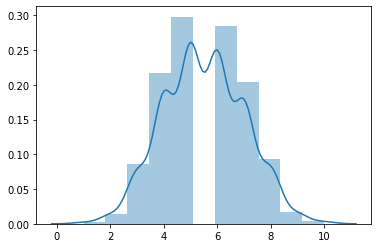

In [27]:
# Barkha

from scipy.stats import binom
import numpy as np
import seaborn as sns
# Number of trials
trials = 1000
# Number of independent experiments in each trial
n = 10
# Probability of success for each experiment
p = 0.45
x = range(0,11)
def run_binom(trials, n, p):
    success = []
    for i in range(trials):
        event = [np.random.random() for i in range(n)]
        success.append(len([i for i in event if i>=0.45]))
    return success
success = run_binom(trials, n, p)
sns.distplot(success, bins=11, label='simulation results')

Problem Statement 7: 
 
Customers arrive at a rate of 72 per hour to my shop. What is the probability of 𝑘 customers arriving in 4 minutes? a) 5 customers, b) not more than 3 customers, c) more than 3 customers. Give a pictorial representation of the same to validate your answer. 
 

poisson's distribution for 5 customer in 4 mins

In [57]:
from math import exp
lam = 72*4/60
# 5 customer in 4 mins
def poisson_dist(lam,x):
     temp = exp(-lam)
     temp = temp*lam**x
     return temp/math.factorial(x)
poisson_dist(lam,4)

0.1820288371290446

In [58]:
# for not more than 3 customers in 4 mins
temp = 0
for i in range(4):
    temp = temp + poisson_dist(lam,4)
temp    

0.7281153485161784

In [59]:
#more than 3 customers in 4 mins:
1 - temp

0.27188465148382157

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson')]

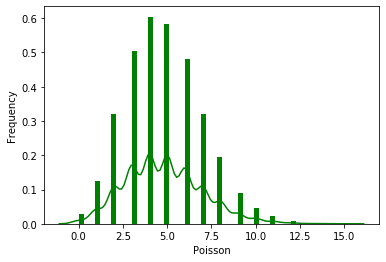

In [60]:
from scipy.stats import poisson
import seaborn as sb

data_binom = poisson.rvs(mu=lam, size=10000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})


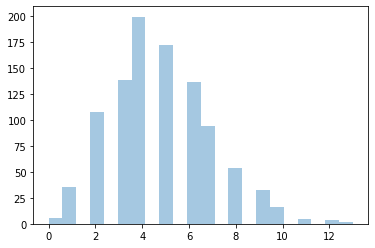

In [61]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.poisson(lam=lam, size=1000), kde=False)

plt.show()

Problem Statement 8: 
 
I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make reports, where I have the efficiency of entering 77 words per minute with 6 errors per hour. What is the probability that I will commit 2 errors in a 455-word financial report? What happens when the no. of words increases/decreases (in case of 1000 words, 255 words)?  
How is the 𝜆 affected? 
 How does it influence the PMF?  
Give a pictorial representation of the same to validate your answer. 
 

In [63]:
lam = 6/(77*60)
lam

0.0012987012987012987

In [65]:
#lam for 455 word
lam_455 = lam*455
poisson_dist(lam_455,2)

0.09669027375144446

In [66]:
lam_1000 = lam*1000
poisson_dist(lam_1000,2)

0.23012815007300153

The PMF increases with increasing lambda

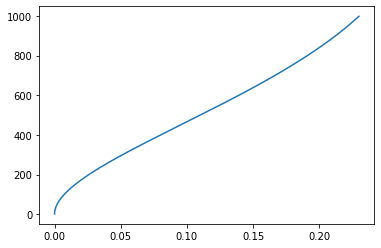

In [73]:
pmf = [poisson_dist(lam*i,2) for i in range(1,1000)]
word_count = [i for i in range(1,1000)]
plt.plot(pmf,word_count)

Problem Statement 9: 
 
Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. The target diameter to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy. Historical data shows that the distribution of D can be modelled by the PDF, f(d) = 20e−20(d−12.5), d ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped, what is the proportion of those parts? What is the CDF when the diameter is of 11 mm? 
 What is the conclusion of this experiment? 

same question as 4, solved above

Problem Statement 10: 
 
Please compute the following: a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6) b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05 c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 

In [74]:
#from http://www.z-table.com/

In [76]:
#P(Z > 1.26)

1 - 0.8962

0.1038

In [77]:
#P(Z < −0.86)
#-0.9+.04
.1736

0.1736

In [79]:
#P(−1.25 < Z < 0.37)
#P(Z < 0.37)
.66447
#P(−1.25)
.0885
result = .66447 - .0885
result

0.57597

In [80]:
#Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05

In [81]:
1 - 0.5199

0.48009999999999997

Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 

In [82]:
0.8389 - .1611

0.6778

Problem Statement 11: 
 
The current flow in a copper wire follow a normal distribution with a mean of 10 𝑚A and a variance of 4 (𝑚𝐴)2.  
What is the probability that a current measurement will exceed 13 𝑚𝐴? What is the probability that a current measurement is between 9 and 11mA? Determine the current measurement which has a probability of 0.98. 
 

In [86]:
z = (13-10)/4
print('Z score: {}'.format(z))

Z score: 0.75


In [91]:
#P(Z<0.75) from Z table
0.7734
#What is the probability that a current measurement will exceed 13 𝑚𝐴? 
1 - 0.7734

0.22660000000000002

In [92]:
z_9 = (9-10)/4
z_11 = (11-10)/4
print('Z_9 score: {}'.format(z_9))
print('Z_11 score: {}'.format(z_11))

Z_9 score: -0.25
Z_11 score: 0.25


In [93]:
#What is the probability that a current measurement is between 9 and 11mA?
#P(Z_11) -P(Z_9) from z table

0.5987 - 0.4013

0.19740000000000002

In [95]:
#P(0.02) from Z table
0.5080

x = 0.5080*4+10
x

12.032

Problem Statement 12: 
 
The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓ 0.0015 inch. What proportion of shafts are in sync with the specifications? If the process is centered so that the mean is equal to the target value of 0.2500, what proportion of shafts conform to the new specifications? What is your conclusion from this experiment? 
 

In [105]:
#specification
piston_upper =  0.2508 + 0.0005 
piston_low =  0.2508 - 0.0005 
z_up = (0.2513 - 0.2500)/0.0015
z_low = (0.2503 - 0.2500)/0.0015
print('Z_upper_upper:{}'.format(z_up))
print('Z_upper_lower:{}'.format(z_low))

Z_upper_upper:0.8666666666666822
Z_upper_lower:0.20000000000001497


In [104]:
#P(z<.86) from Z table
0.8051
#P(z<.20) from Z table
0.5793
#proportion of shafts are in sync with the specifications
0.8051 - 0.5793

0.2258